<a href="https://colab.research.google.com/github/AayushiShah03/Encryptix/blob/main/Task_1_Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [82]:
from google.colab import files
uploaded = files.upload()

Saving Titanic.csv to Titanic (2).csv


In [83]:
# Reading csv file
data = pd.read_csv('/content/Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [85]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [87]:
#Replacing missing values with median
data['Age'] = data['Age'].fillna(data['Age'].median())

#Dropping cabin column from the dataset
data = data.drop(columns='Cabin', axis=1)

#Finding mode of Embarked column
print(data['Embarked'].mode())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

0    S
Name: Embarked, dtype: object


In [88]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [89]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

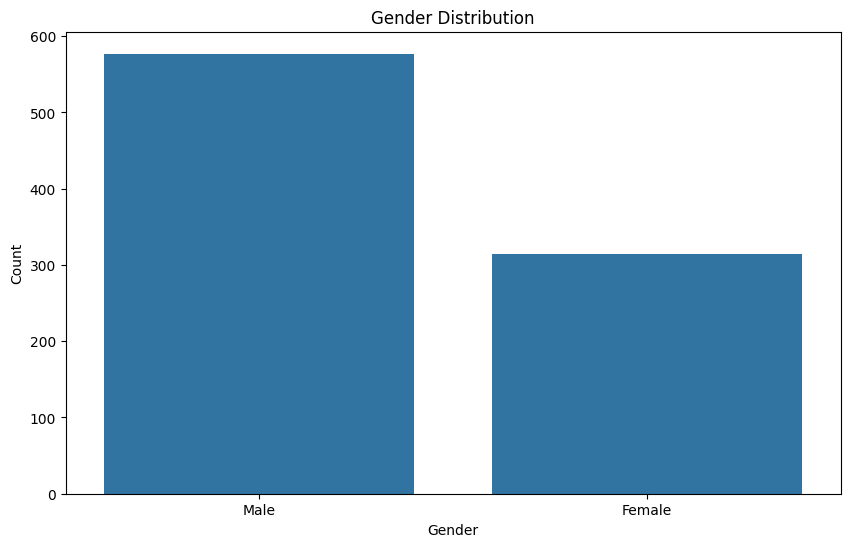

In [90]:
# Plotting Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

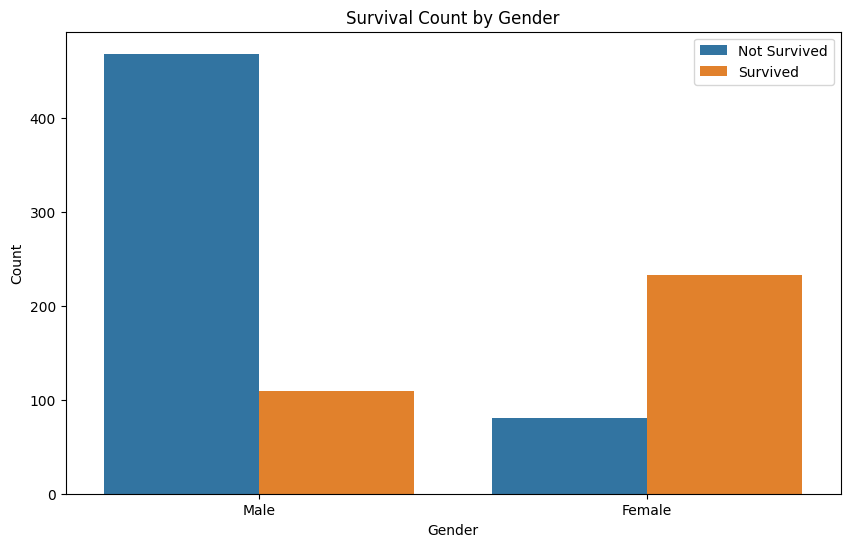

In [91]:
# Survival rate by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

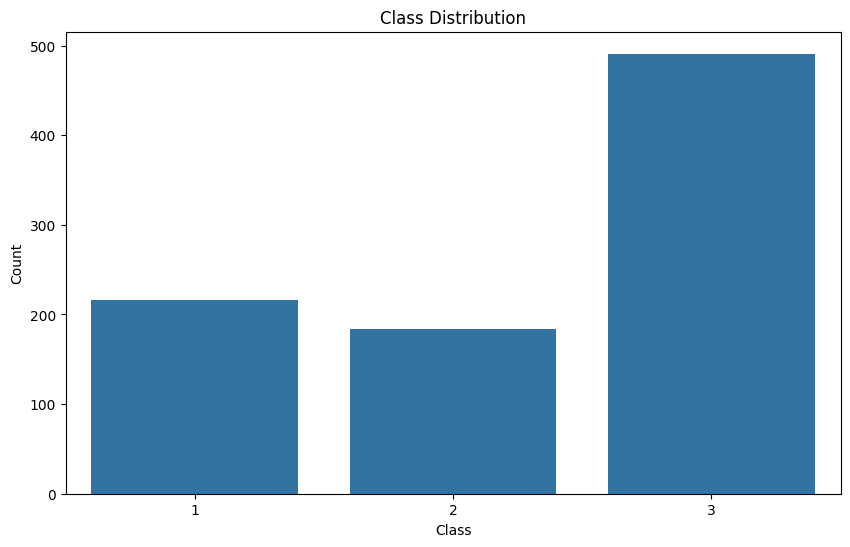

In [92]:
# Plotting Class
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

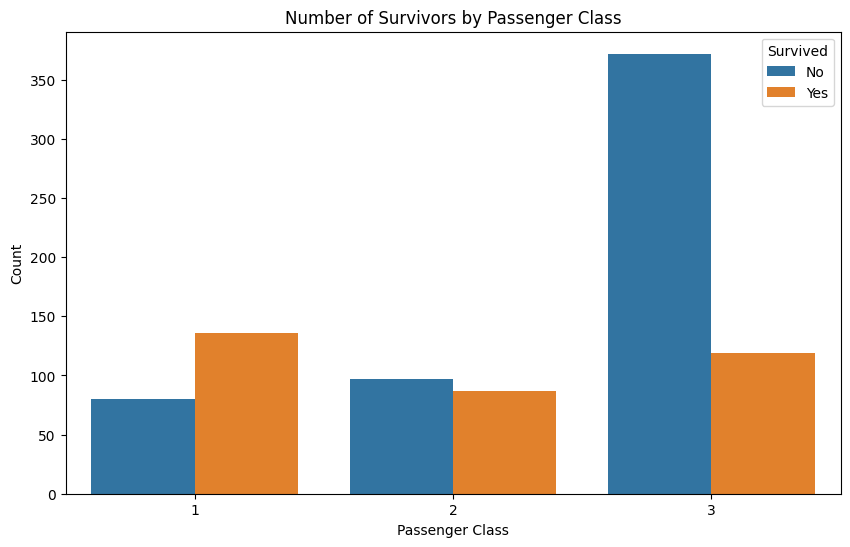

In [93]:
# Survival rate by class
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Number of Survivors by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

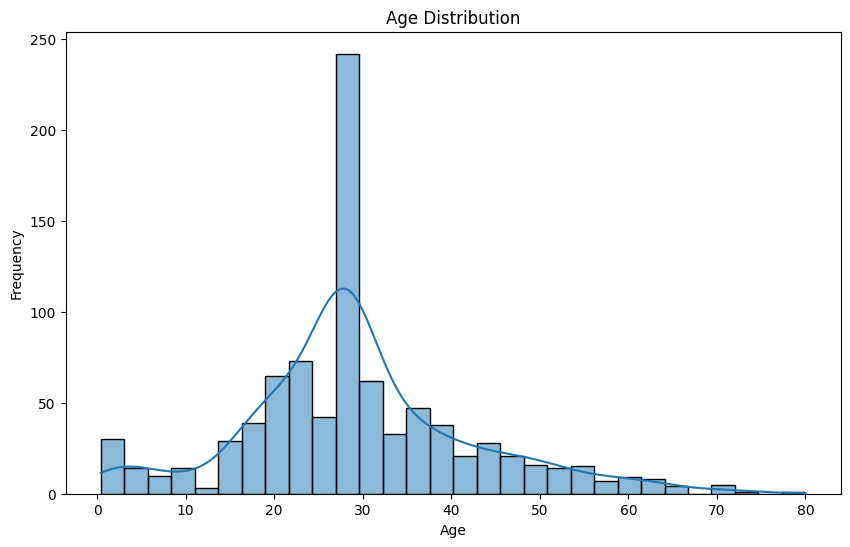

In [94]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [95]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [96]:
data.replace({'Sex':{'male':0,'female':1}},inplace = True)

In [97]:
data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [98]:
data.replace({'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

In [99]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [100]:
X = data.drop(columns=['PassengerId','Survived', 'Name', 'Ticket','Fare'],axis=1)
y = data['Survived']

In [101]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,22.0,1,0,0
1,1,1,38.0,1,0,1
2,3,1,26.0,0,0,0
3,1,1,35.0,1,0,0
4,3,0,35.0,0,0,0
...,...,...,...,...,...,...
886,2,0,27.0,0,0,0
887,1,1,19.0,0,0,0
888,3,1,28.0,1,2,0
889,1,0,26.0,0,0,1


In [102]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape,X_train.shape,X_test.shape)

(891, 6) (712, 6) (179, 6)


In [104]:
model = LogisticRegression(max_iter=200)
model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [108]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

cm = confusion_matrix(y_test,y_pred)
print("\nConfusion Matrix:\n",cm)

Accuracy: 0.8044692737430168

Confusion Matrix:
 [[90 15]
 [20 54]]


In [113]:
def predict_survival(model):
    print("Welcome to Titanic Survival Prediction!")
    print("Please answer the following questions to predict survival.")

    # collecting user input
    pclass = int(input("\nWhat was the passenger's class (1st, 2nd, or 3rd)? "))
    sex = input("What was the passenger's sex (male/female)? ").lower()
    age = int(input("What was the passenger's age? "))
    siblings_spouses = int(input("How many siblings/spouses were aboard? "))
    parents_children = int(input("How many parents/children were aboard? "))
    embarked = input("Where did the passenger embark (S, C, or Q)? ").upper()

    # Create a DataFrame from user input
    input_data = pd.DataFrame({
        'Pclass': [pclass],
        'Sex': [sex],
        'Age': [age],
        'SibSp': [siblings_spouses],
        'Parch': [parents_children],
        'Embarked': [embarked]
    })

    # Preprocess input data
    input_data['Embarked'] = input_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    input_data.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)

    # Make prediction
    prediction = model.predict_proba(input_data)

    # Display prediction
    print(f"The predicted probability of survival is {prediction[0][1]*100:.2f}%.")

predict_survival(model)


Welcome to Titanic Survival Prediction!
Please answer the following questions to predict survival.

What was the passenger's class (1st, 2nd, or 3rd)? 2
What was the passenger's sex (male/female)? male
What was the passenger's age? 20
How many siblings/spouses were aboard? 2
How many parents/children were aboard? 2
Where did the passenger embark (S, C, or Q)? c
The predicted probability of survival is 21.69%.
